<a href="https://colab.research.google.com/github/Maradonas/FIAP-TECH-CHALLENGER-1/blob/diego-analises/Analise%20dados/Importacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick


###Tratativa dos dados

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/Maradonas/FIAP-TECH-CHALLENGER-1/refs/heads/diego-analises/Dados/Ddo_ImpVinhos.csv',sep='\t')

In [3]:
df.rename(columns = {'País':'Pais'},inplace=True)

In [4]:
quant_cols = [col for col in df.columns if not str(col).endswith('.1') and col not in ['Id', 'Pais']]

# As colunas de valor são as que terminam com .1 (e correspondem aos mesmos anos)
valor_cols = [col for col in df.columns if str(col).endswith('.1')]

# Extrair apenas os anos dos nomes das colunas (removendo o .1 para valor)
anos_quant = [str(col) for col in quant_cols if col not in ['Id', 'Pais']]
anos_valor = [str(col).replace('.1', '') for col in valor_cols]

In [5]:
df_quant = df.melt(id_vars=['Id', 'Pais'],
                   value_vars=quant_cols,
                   var_name='Ano',
                   value_name='Quantidade_litros')

df_valor = df.melt(id_vars=['Id', 'Pais'],
                  value_vars=valor_cols,
                  var_name='Ano',
                  value_name='Valor_USD')

# Corrigir os nomes dos anos no dataframe de valor
df_valor['Ano'] = df_valor['Ano'].str.replace('.1', '')

In [6]:
df_quant['Ano'] = pd.to_datetime(df_quant['Ano'])
df_quant['Pais'] = df_quant['Pais'].astype('category')



df_valor['Ano'] = pd.to_datetime(df_valor['Ano'])
df_valor['Pais'] = df_valor['Pais'].astype('category')



In [7]:
df_quant  = df_quant.loc[df_quant['Ano'] >= '2009']
df_valor  = df_valor.loc[df_valor['Ano'] >= '2009']

In [8]:
display(df_quant)
display(df_valor)

,Id,Pais,Ano,Quantidade_litros
2691,1,Africa do Sul,2009-01-01,493093
2692,2,Alemanha,2009-01-01,56075
2693,3,Argélia,2009-01-01,0
2694,4,Arábia Saudita,2009-01-01,0
2695,5,Argentina,2009-01-01,13902750
...,...,...,...,...
3790,65,Ucrânia,2024-01-01,0
3791,66,Uruguai,2024-01-01,3015429
3792,67,Não consta na tabela,2024-01-01,0
3793,68,Não declarados,2024-01-01,0


,Id,Pais,Ano,Valor_USD
2691,1,Africa do Sul,2009-01-01,1931449
2692,2,Alemanha,2009-01-01,291876
2693,3,Argélia,2009-01-01,0
2694,4,Arábia Saudita,2009-01-01,0
2695,5,Argentina,2009-01-01,38521731
...,...,...,...,...
3790,65,Ucrânia,2024-01-01,0
3791,66,Uruguai,2024-01-01,9827906
3792,67,Não consta na tabela,2024-01-01,0
3793,68,Não declarados,2024-01-01,0


### ANALISE QUANTIDADE

In [9]:
#ANALISE EXPLORATORIA PARA A QUANTIDADE


df_quant_agrupado = df_quant.groupby('Pais', as_index=False)['Quantidade_litros'].sum()
df_quant_agrupado_top10 = df_quant_agrupado.sort_values(by='Quantidade_litros', ascending=False).head(10)


df_quant['Pais'] = df_quant['Pais'].str.strip().str.upper()
df_quant_agrupado_top10['Pais'] = df_quant_agrupado_top10['Pais'].str.strip().str.upper()

# Agora refaça a lista
lista_paises = df_quant_agrupado_top10['Pais'].tolist()




# Filtrando os 5 países com maior quantidade
df_quant_agrupado_top5 = df_quant_agrupado.sort_values(by='Quantidade_litros', ascending=False).head(5)

# Padronizando os nomes dos países
df_quant['Pais'] = df_quant['Pais'].str.strip().str.upper()
df_quant_agrupado_top5['Pais'] = df_quant_agrupado_top5['Pais'].str.strip().str.upper()

# Gerando a lista dos 5 países
lista_paises = df_quant_agrupado_top5['Pais'].tolist()

# Filtrando os dados para incluir apenas os países da lista
df_quant_historico = df_quant[df_quant['Pais'].isin(lista_paises)]

<ipython-input-9-3f813af280b9>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_quant_agrupado = df_quant.groupby('Pais', as_index=False)['Quantidade_litros'].sum()


<ipython-input-10-fc9407e973ab>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


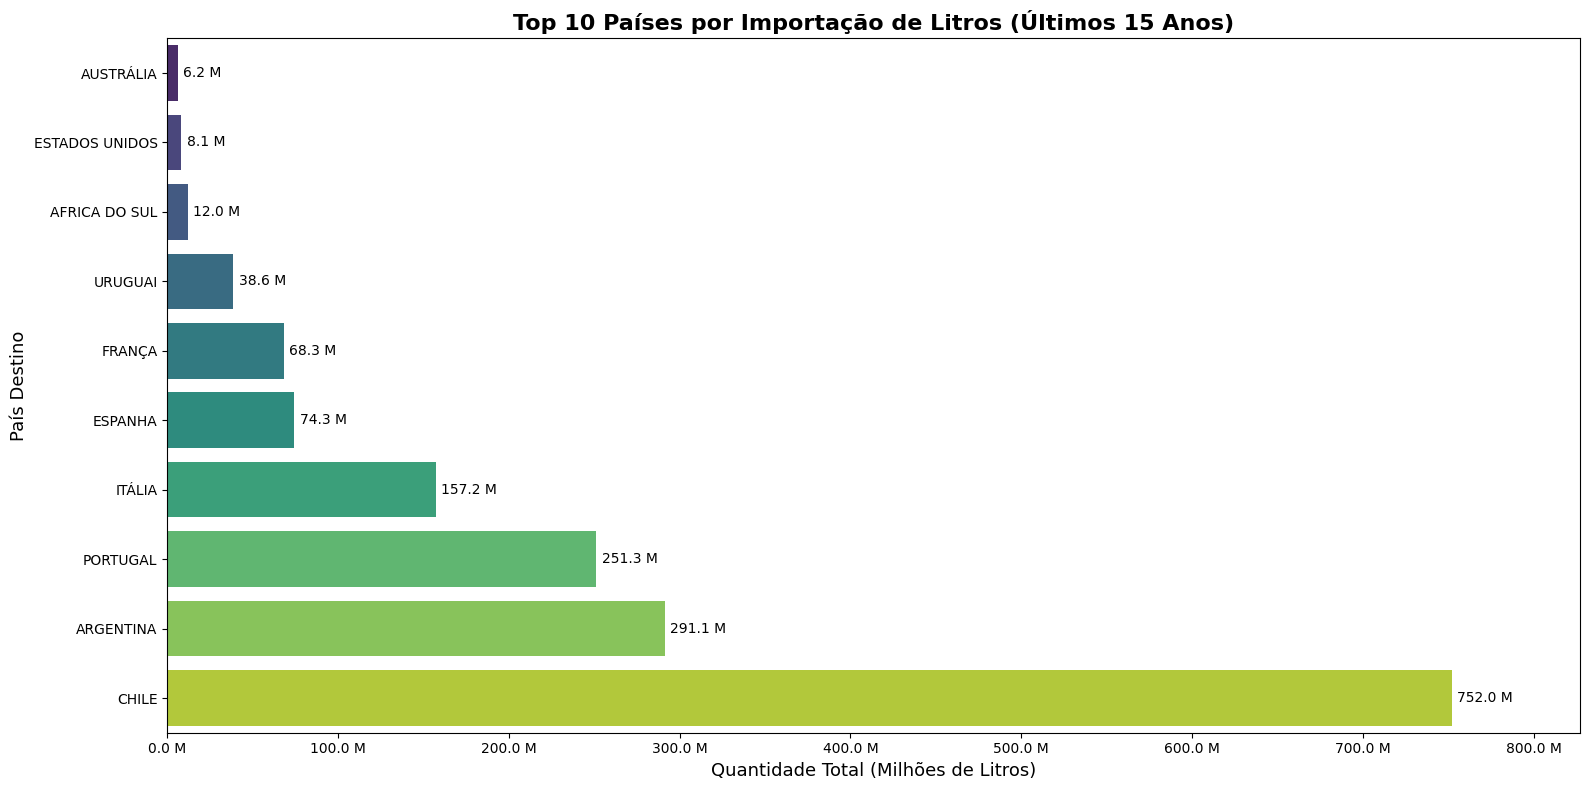

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Copia e converte para milhões
df_plot = df_quant_agrupado_top10.copy()
df_plot['Quantidade_milhoes'] = df_plot['Quantidade_litros'] / 1e6

# Ordena
df_plot = df_plot.sort_values('Quantidade_milhoes', ascending=True)

# Inicia a figura maior
plt.figure(figsize=(16, 8))

ax = sns.barplot(
    data=df_plot,
    y='Pais',
    x='Quantidade_milhoes',
    palette='viridis',
    dodge=False
)

# Adiciona os rótulos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f M', label_type='edge', padding=4)

# Título e eixos
plt.title('Top 10 Países por Importação de Litros (Últimos 15 Anos)',
          fontsize=16, weight='bold')

plt.xlabel('Quantidade Total (Milhões de Litros)', fontsize=13)
plt.ylabel('País Destino', fontsize=13)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f} M'))

# Ajuste para dar espaço ao último valor
plt.xlim(0, df_plot['Quantidade_milhoes'].max() * 1.1)

plt.tight_layout()
plt.show()


In [11]:
df_quant_historico['Quantidade_litros'].max()

73111416

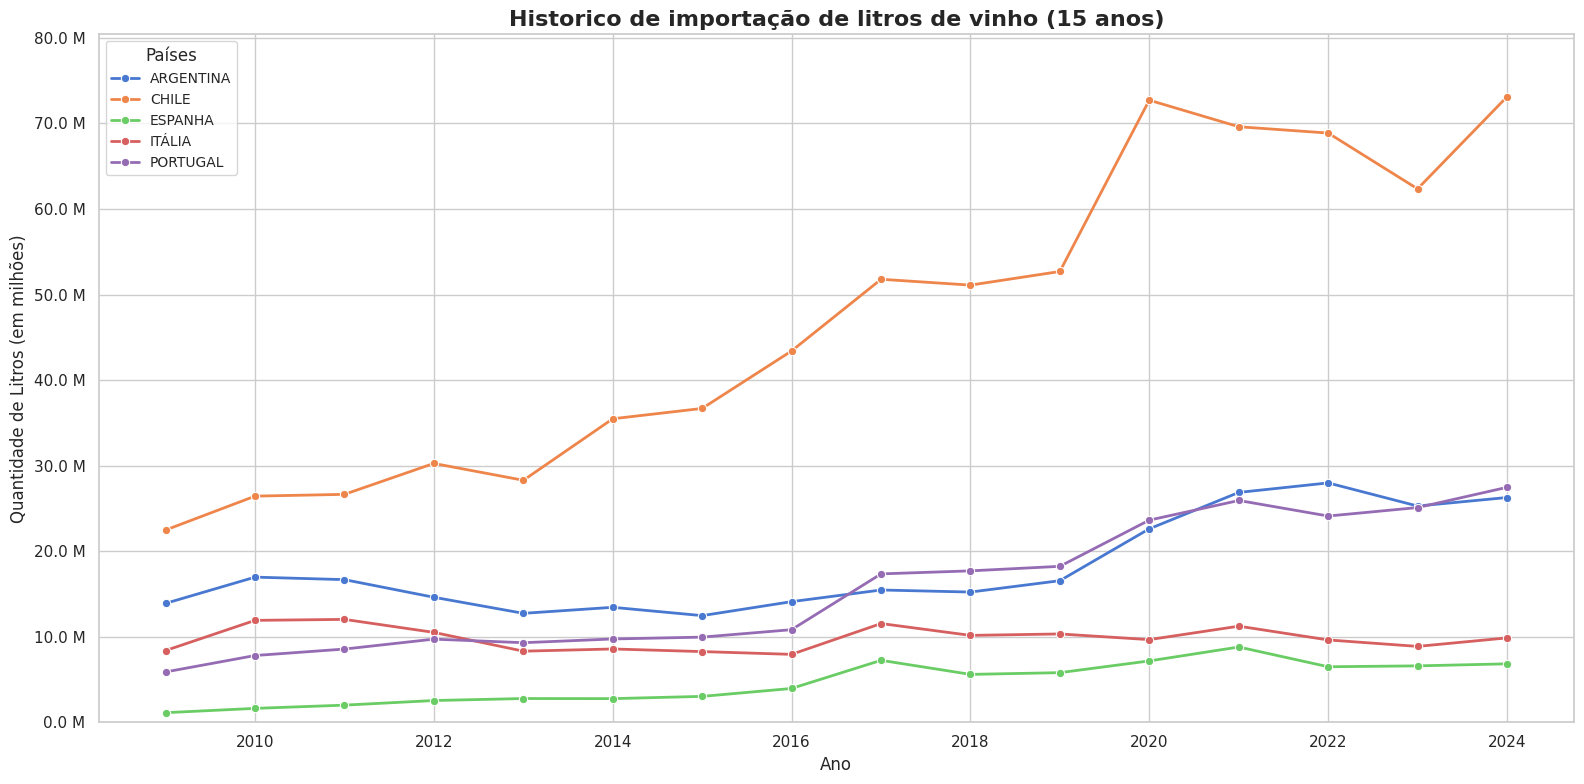

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Ajustando o estilo
sns.set(style="whitegrid")  # Estilo de fundo mais limpo

# Criando o gráfico
plt.figure(figsize=(16, 8))  # Tamanho maior para facilitar a visualização
ax = sns.lineplot(data=df_quant_historico,
                  x='Ano',
                  y='Quantidade_litros',
                  hue='Pais',
                  palette='muted',
                  lw=2,
                  marker='o')

# Melhorando o título e rótulos
plt.title('Historico de importação de litros de vinho (15 anos)', fontsize=16, fontweight='bold')  # Título em negrito e maior

plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Litros (em milhões)', fontsize=12)

# Ajustando a legenda
plt.legend(title='Países', loc='upper left', fontsize=10)

# Formatando o eixo Y em milhões
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.1f} M'))

# Ajustando os limites do eixo Y
plt.ylim(0, df_quant_historico['Quantidade_litros'].max() * 1.1)  # Deixando um espaço extra no topo

# Exibindo o gráfico
plt.tight_layout()
plt.show()


### Analise do Valor

In [13]:

# Padroniza nomes dos países (remove espaços e coloca em maiúsculas)
df_valor['Pais'] = df_valor['Pais'].str.strip().str.upper()

# Agrupa por país e soma os valores
df_valor_agrupado = df_valor.groupby('Pais', as_index=False)['Valor_USD'].sum()

# Seleciona os 10 países com maior valor total
df_valor_agrupado_top10 = df_valor_agrupado.sort_values('Valor_USD', ascending=False).head(10)

# Cria lista dos países Top 10 para filtrar dados históricos
top10_paises = df_valor_agrupado_top10['Pais'].tolist()

# Filtra o DataFrame original para ter apenas dados dos Top 10
df_valor_historico = df_valor[df_valor['Pais'].isin(top10_paises)]

<ipython-input-14-0d7431fcf722>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


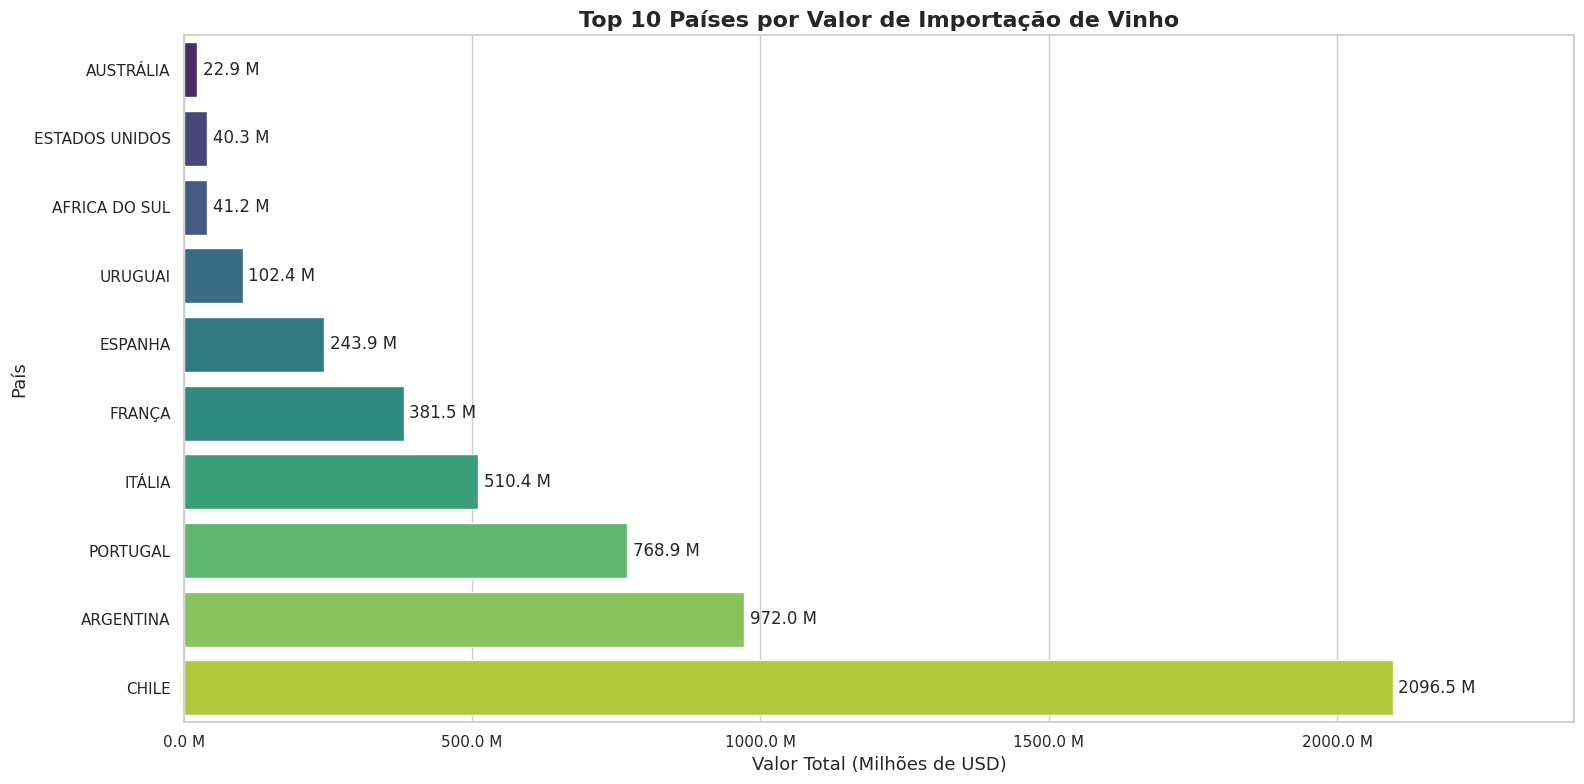

In [14]:
# Cria cópia e converte para milhões
df_plot = df_valor_agrupado_top10.copy()
df_plot['Valor_milhoes'] = df_plot['Valor_USD'] / 1e6

# Ordena do menor para maior para melhor visualização
df_plot = df_plot.sort_values('Valor_milhoes', ascending=True)

# Configura o gráfico
plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=df_plot,
    y='Pais',
    x='Valor_milhoes',
    palette='viridis',
    dodge=False
)

# Adiciona rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f M', label_type='edge', padding=4)

# Configura título e eixos
plt.title('Top 10 Países por Valor de Importação de Vinho',
          fontsize=16, weight='bold')
plt.xlabel('Valor Total (Milhões de USD)', fontsize=13)
plt.ylabel('País', fontsize=13)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.1f} M'))

# Ajusta limites do eixo X
plt.xlim(0, df_plot['Valor_milhoes'].max() * 1.15)

plt.tight_layout()
plt.show()


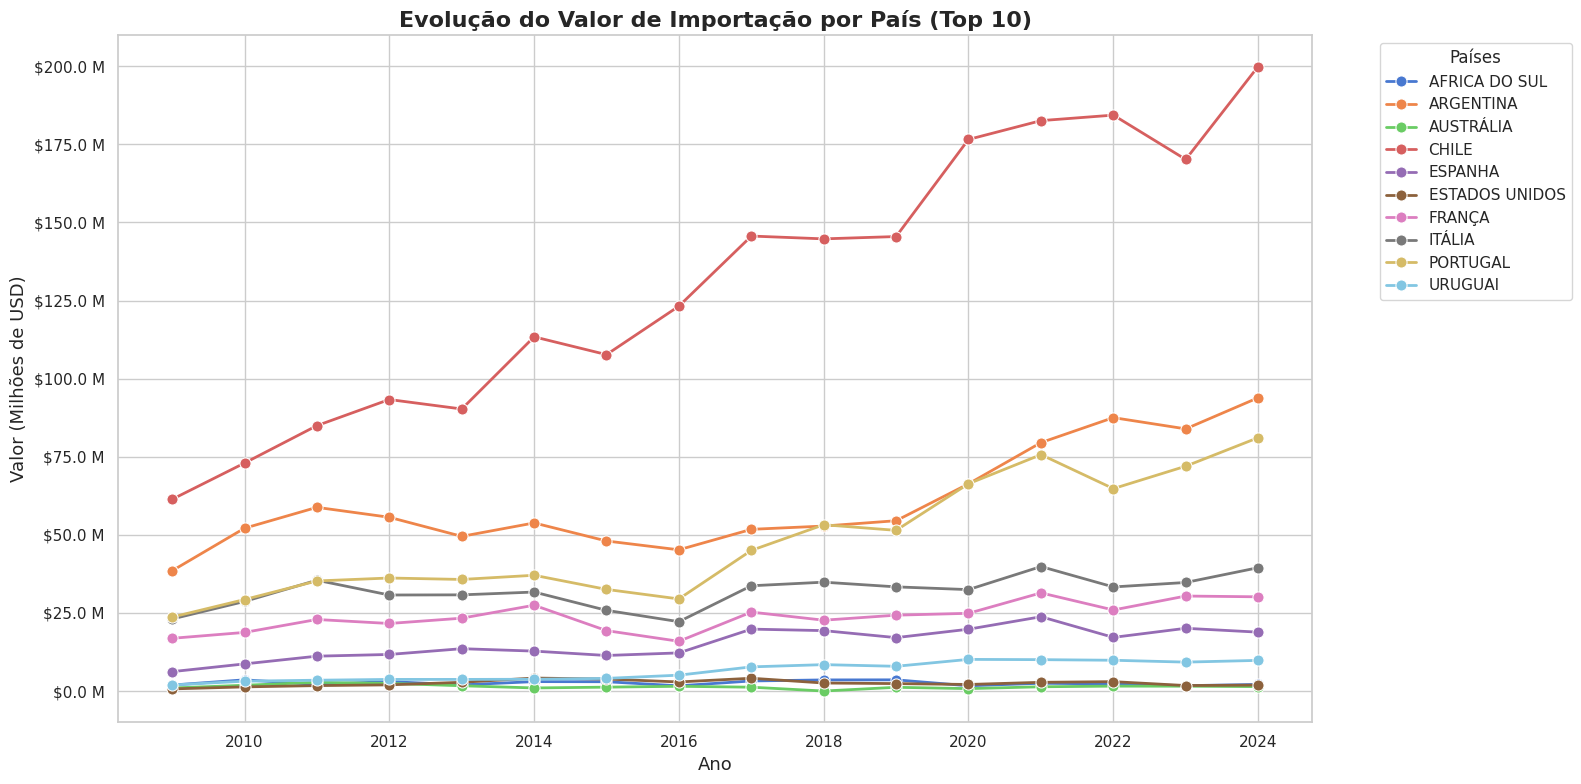

In [15]:

# Configura estilo
sns.set(style="whitegrid")

# Cria gráfico de linhas
plt.figure(figsize=(16, 8))
ax = sns.lineplot(
    data=df_valor_historico,
    x='Ano',
    y='Valor_USD',
    hue='Pais',
    palette='muted',
    linewidth=2,
    marker='o',
    markersize=8
)

# Configurações visuais
plt.title('Evolução do Valor de Importação por País (Top 10)',
          fontsize=16, weight='bold')
plt.xlabel('Ano', fontsize=13)
plt.ylabel('Valor (Milhões de USD)', fontsize=13)

# Formata eixo Y em milhões
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1e6:.1f} M'))

# Configura legenda
plt.legend(title='Países',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

plt.tight_layout()
plt.show()

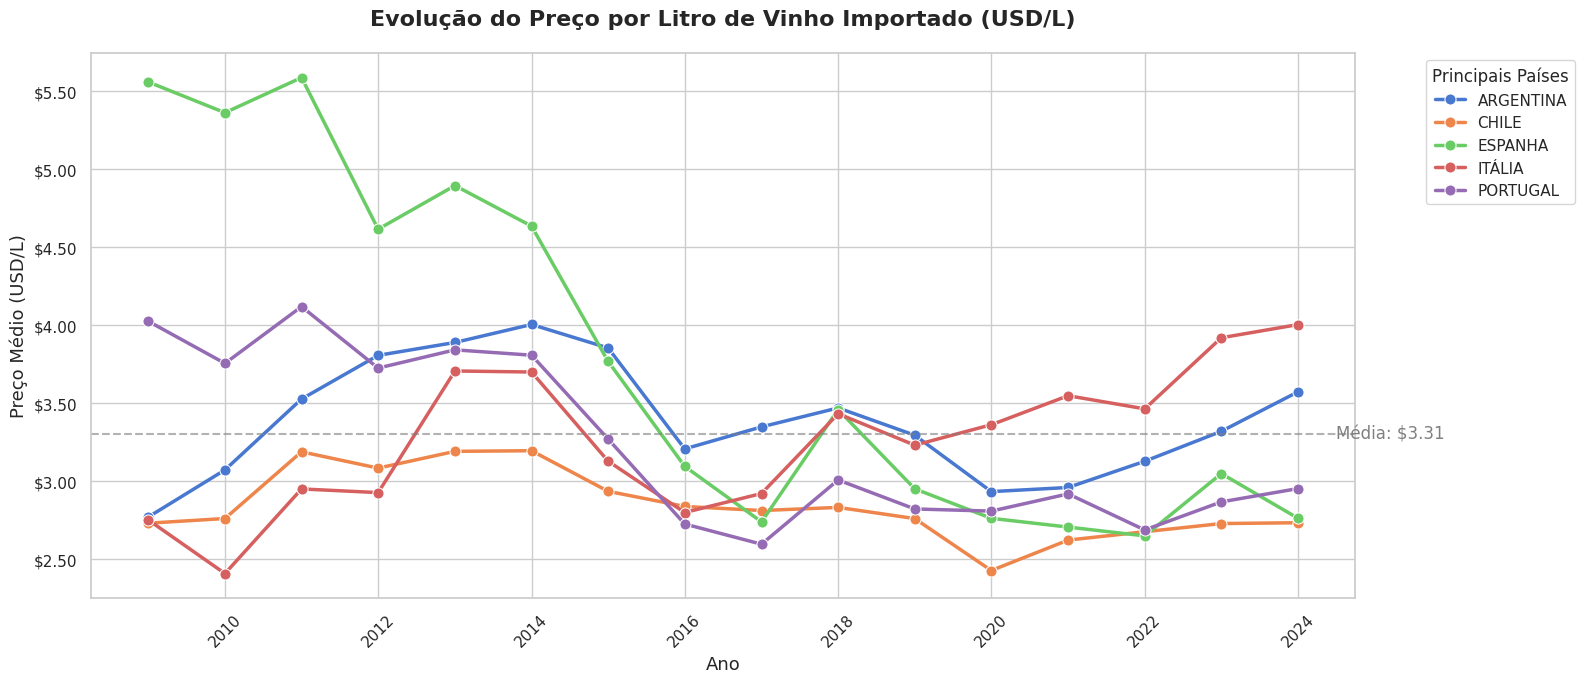

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## -----------------------------------------------------------
## 1. CÁLCULO DO PREÇO POR LITRO
## -----------------------------------------------------------

# Combinar os dados de quantidade e valor
df_preco = pd.merge(
    df_quant,
    df_valor,
    on=['Id', 'Pais', 'Ano'],
    how='inner'
)

# Calcular preço por litro (USD/L) e filtrar valores inválidos
df_preco['Preco_por_Litro'] = df_preco['Valor_USD'] / df_preco['Quantidade_litros']
df_preco = df_preco[df_preco['Preco_por_Litro'].notna() & (df_preco['Quantidade_litros'] > 0)]

# Selecionar os 5 países com maior volume total para análise
top_paises = df_preco.groupby('Pais')['Quantidade_litros'].sum().nlargest(5).index
df_preco_top = df_preco[df_preco['Pais'].isin(top_paises)]


# Ordenar por ano para garantir a sequência correta
df_preco_top = df_preco_top.sort_values('Ano')

## -----------------------------------------------------------
## 2. GRÁFICO DE LINHA - EVOLUÇÃO DO PREÇO/L
## -----------------------------------------------------------

# Configurações de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16, 7))


# Criar gráfico
ax = sns.lineplot(
    data=df_preco_top,
    x='Ano',
    y='Preco_por_Litro',
    hue='Pais',
    palette='muted',
    linewidth=2.5,
    marker='o',
    markersize=8
)

# Personalizações
plt.title('Evolução do Preço por Litro de Vinho Importado (USD/L)',
          fontsize=16, pad=20, weight='bold')
plt.xlabel('Ano', fontsize=13)
plt.ylabel('Preço Médio (USD/L)', fontsize=13)
plt.xticks(rotation=45)

# Formatar eixo Y para mostrar 2 decimais
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:.2f}'))

# Linha de média global
media_global = df_preco_top['Preco_por_Litro'].mean()
plt.axhline(media_global, color='gray', linestyle='--', alpha=0.6)

plt.text(
    x=df_preco_top['Ano'].max() + pd.DateOffset(months=6),  # ou days=15, etc.
    y=media_global,
    s=f'Média: ${media_global:.2f}',
    va='center',
    ha='left',
    color='gray'
)

# Legenda
plt.legend(
    title='Principais Países',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()

<ipython-input-18-9cee9e9abc4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


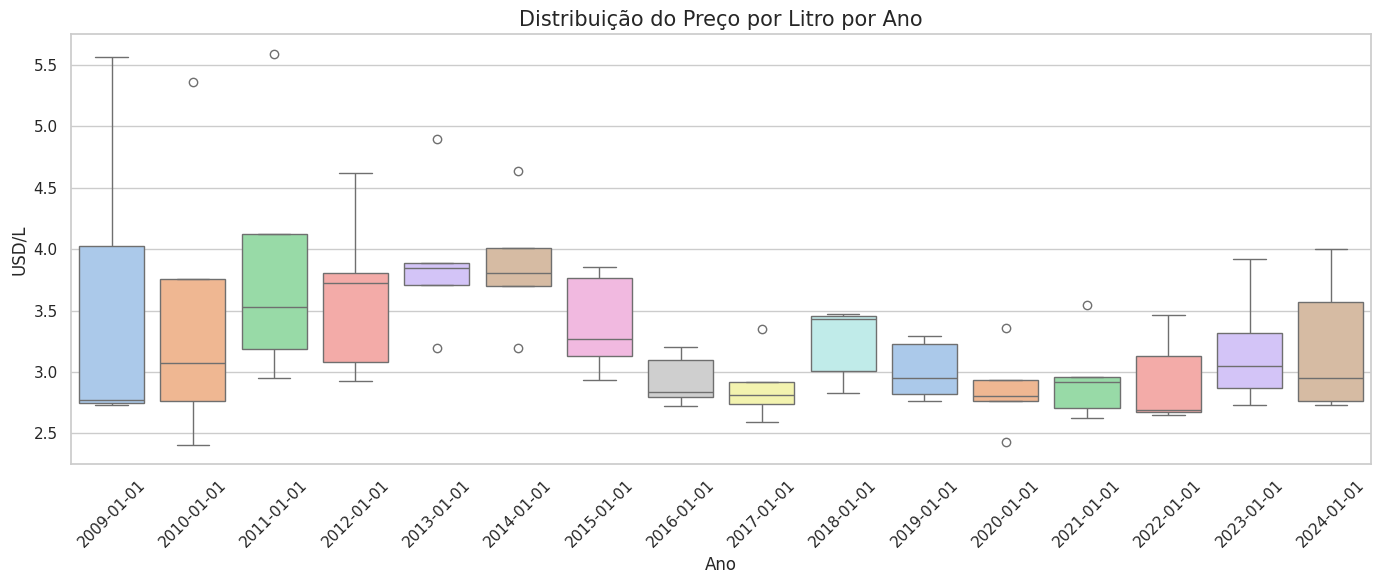

In [18]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_preco_top,
    x='Ano',
    y='Preco_por_Litro',
    palette='pastel'
)
plt.title('Distribuição do Preço por Litro por Ano', fontsize=15)
plt.ylabel('USD/L')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()